# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

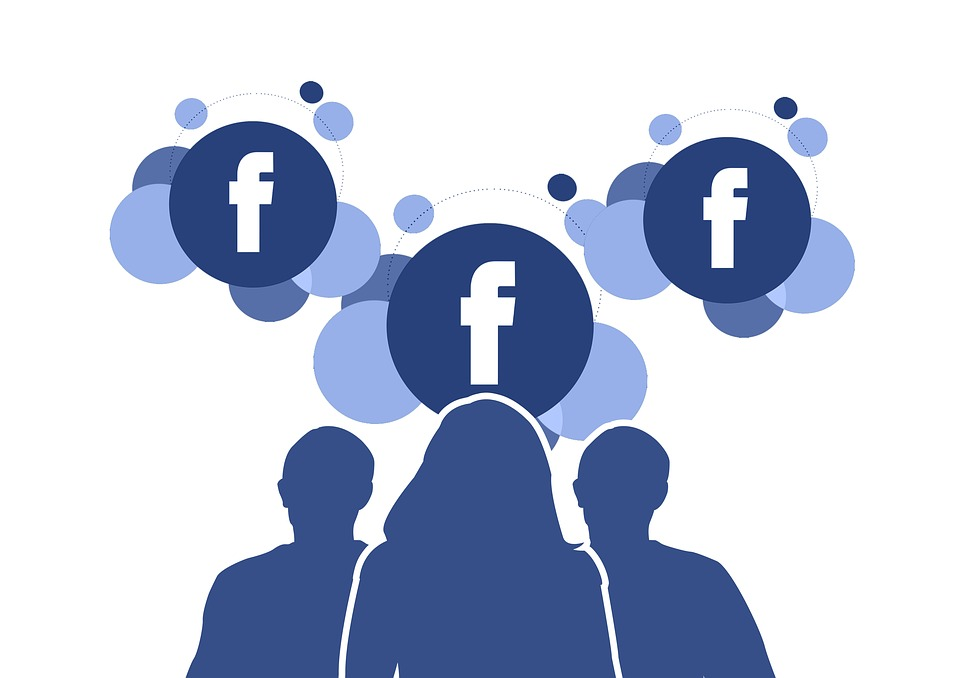

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pygal
from IPython.display import SVG
import warnings
warnings.filterwarnings("ignore")

# STEP #1: IMPORT DATASET

In [2]:
data = pd.read_csv('Facebook_Ads_2.csv', encoding = 'ISO-8859-1')

In [3]:
print('Rows: {}, Columns: {}'.format(data.shape[0], data.shape[1]))

Rows: 499, Columns: 6


In [4]:
data.head()

Names                                             emails  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Time Spent on Site       Salary  Clicked  
0      Bulgaria           25.649648  55330.06006        0  
1        Belize           32.456107  79049.07674        1  
2       Algeria           20.945978  41098.60826        0  
3  Cook Islands           54.039325  37143.35536        1  
4        Brazil           34.249729  37355.11276        0

In [5]:
data.drop(['Names', 'emails'], axis = 1, inplace = True) #Dropping Names and Emails because its irrelevant

# STEP #2: EXPLORE/VISUALIZE DATASET

In [6]:
data.isnull().sum() # Checking for null values

Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [7]:
def get_country_code(country_name): #Defining Function for Country names to country code for plotting
    for code, name in pygal.maps.world.COUNTRIES.items():
        if name == country_name:
            return code
    return None

In [8]:
clicked = data[data.Clicked == 1] #Filtering data such that person have clicked ads.
not_clicked = data[data.Clicked == 0] #Filtering data such that person have not clicked ads.

In [9]:
clicked_ad = {}  #Creating a dictionary of Country Code of person clicked ads for ploting in world map
for key in list(clicked.Country): 
    for value in list(clicked.Clicked): 
        clicked_ad[get_country_code(key)] = value 
        list(clicked.Clicked).remove(value) 
        break  
    
not_clicked_ad = {} #Creating a dictionary of Country Code of person not clicked ads for ploting in world map
for key in list(not_clicked.Country): 
    for value in list(not_clicked.Clicked): 
        not_clicked_ad[get_country_code(key)] = value 
        list(not_clicked.Clicked).remove(value) 
        break  

In [10]:
time_spent = clicked[clicked['Time Spent on Site'] > (clicked['Time Spent on Site'].mean())] 
#Creating a dictionary of Country Code of person Most Time spent for ploting in world map
most_time_spent = {} 
for key in list(time_spent.Country): 
    for value in list(time_spent['Time Spent on Site']): 
        most_time_spent[get_country_code(key)] = value 
        list(time_spent['Time Spent on Site']).remove(value) 
        break 

time_spent = not_clicked[not_clicked['Time Spent on Site']< not_clicked['Time Spent on Site'].mean()]
#Creating a dictionary of Country Code of person Least Time spent for ploting in world map
least_time_spent = {} 
for key in list(time_spent.Country): 
    for value in list(time_spent['Time Spent on Site']): 
        least_time_spent[get_country_code(key)] = value 
        list(time_spent['Time Spent on Site']).remove(value) 
        break 

In [11]:
salary = clicked[clicked['Salary']> clicked['Salary'].mean()] 
#Creating a dictionary of Country Code of person Most Salary for ploting in world map
most_salary = {} 
for key in list(salary.Country): 
    for value in list(salary['Salary']): 
        most_salary[get_country_code(key)] = value 
        list(salary['Salary']).remove(value) 
        break 

salary = not_clicked[not_clicked['Salary']< not_clicked['Salary'].mean()]
#Creating a dictionary of Country Code of person Least Salary for ploting in world map
least_salary = {} 
for key in list(salary.Country): 
    for value in list(salary['Salary']): 
        least_salary[get_country_code(key)] = value 
        list(salary['Salary']).remove(value) 
        break 

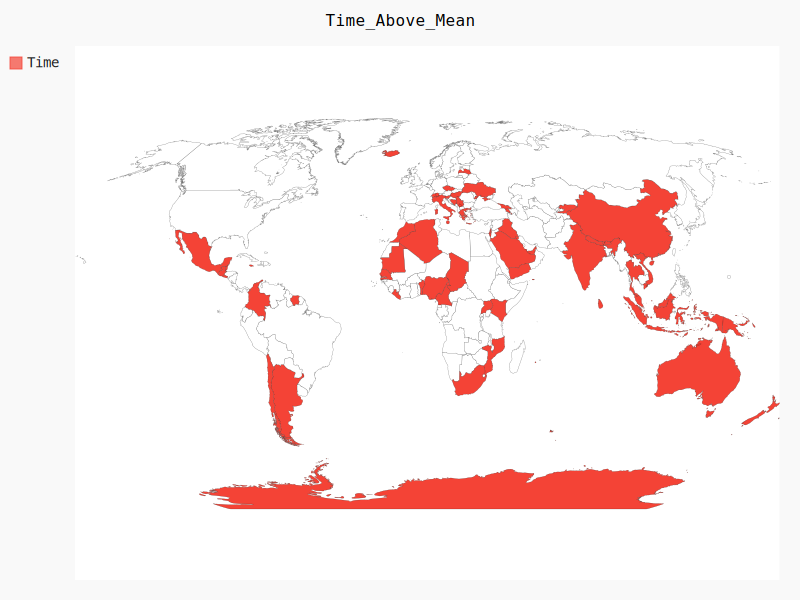

In [12]:
worldmap_chart = pygal.maps.world.World() #Ploting for Time Most Spent
worldmap_chart.title = 'Time_Above_Mean'
worldmap_chart.add('Time', most_time_spent)
SVG(worldmap_chart.render())

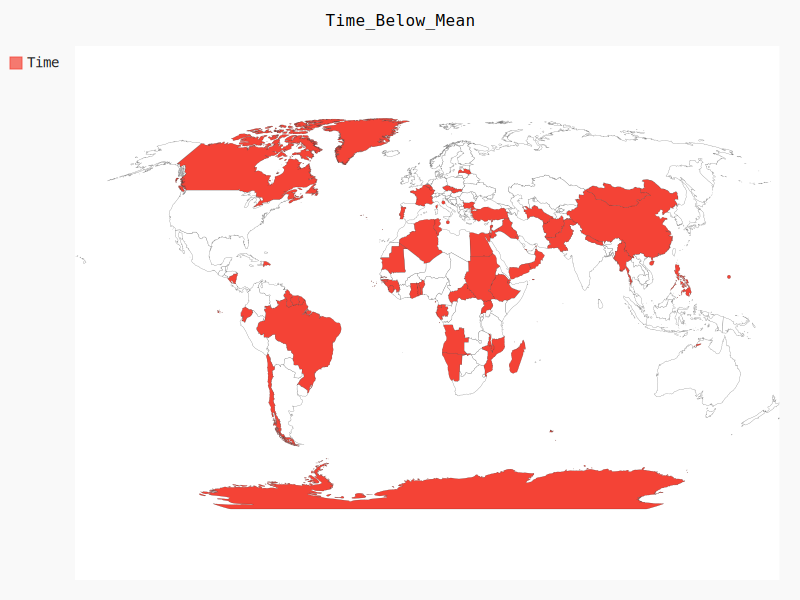

In [13]:
worldmap_chart = pygal.maps.world.World() #Ploting for Time Least Spent
worldmap_chart.title = 'Time_Below_Mean'
worldmap_chart.add('Time', least_time_spent)
SVG(worldmap_chart.render())

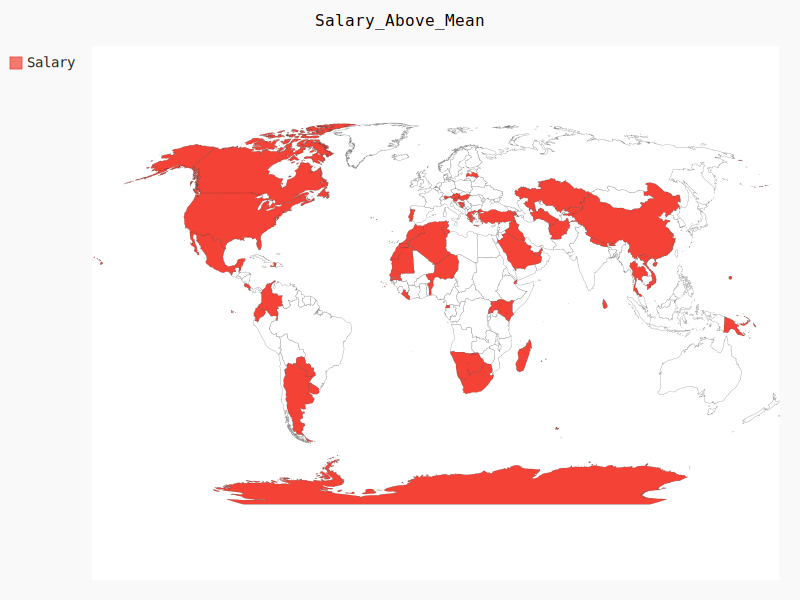

In [14]:
worldmap_chart = pygal.maps.world.World() #Ploting for Most Salary
worldmap_chart.title = 'Salary_Above_Mean'
worldmap_chart.add('Salary', most_salary)
SVG(worldmap_chart.render())

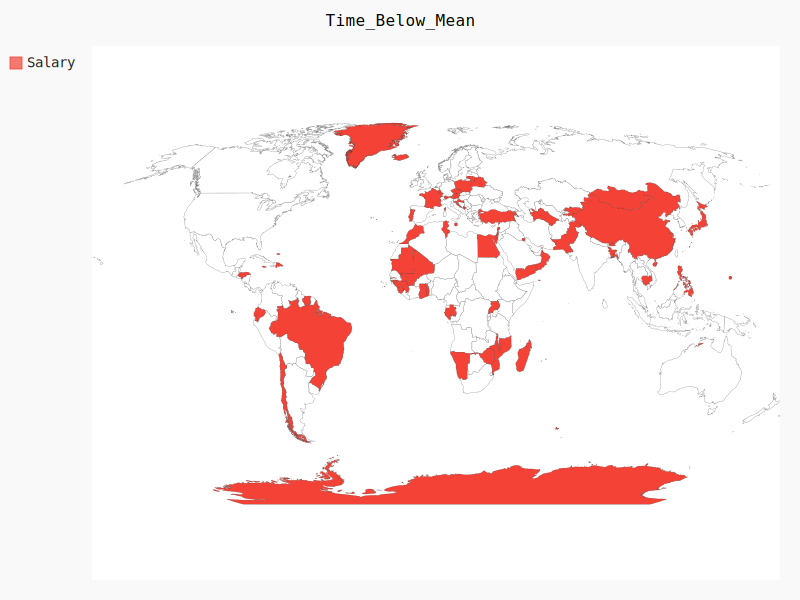

In [15]:
worldmap_chart = pygal.maps.world.World() #Ploting for Least Salary
worldmap_chart.title = 'Time_Below_Mean'
worldmap_chart.add('Salary', least_salary)
SVG(worldmap_chart.render())

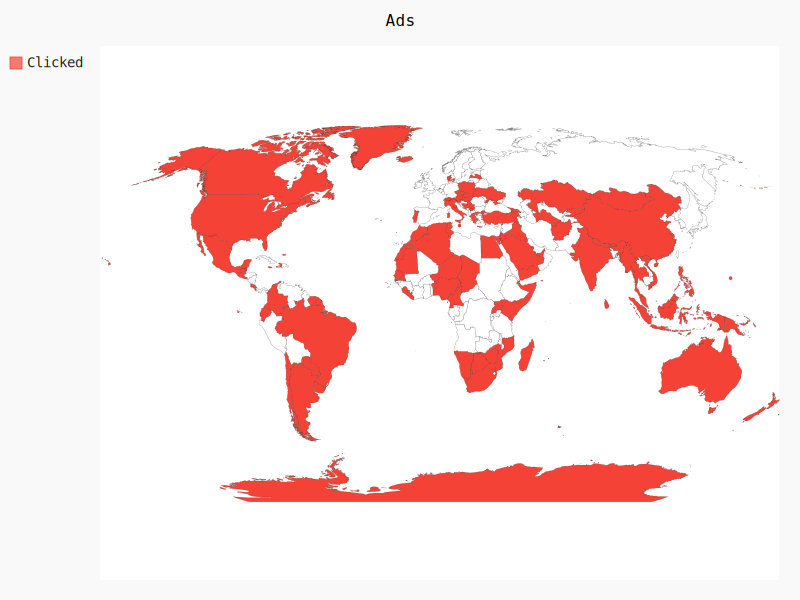

In [16]:
worldmap_chart = pygal.maps.world.World() #Ploting for Ads CLicked
worldmap_chart.title = 'Ads'
worldmap_chart.add('Clicked', clicked_ad)
SVG(worldmap_chart.render())

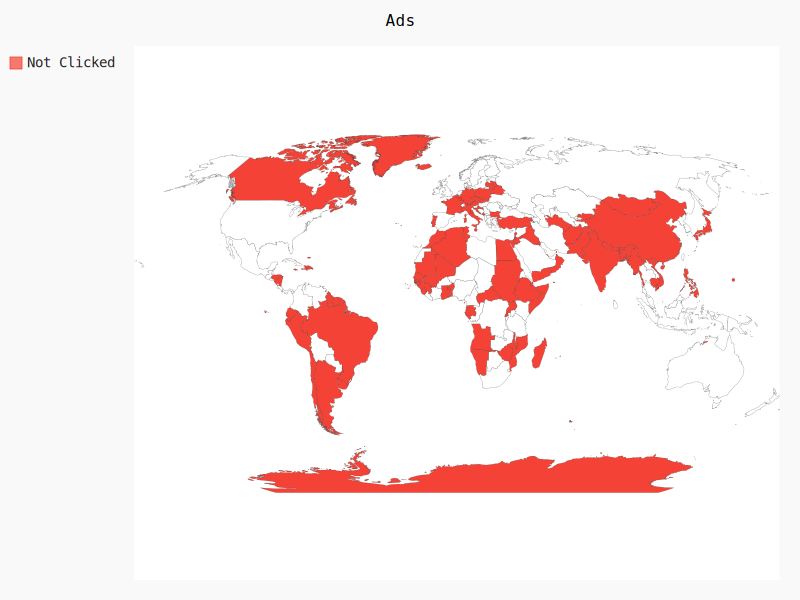

In [17]:
worldmap_chart = pygal.maps.world.World() #Ploting for Ads Not CLicked
worldmap_chart.title = 'Ads'
worldmap_chart.add('Not Clicked', not_clicked_ad)
SVG(worldmap_chart.render(is_unicode = True))

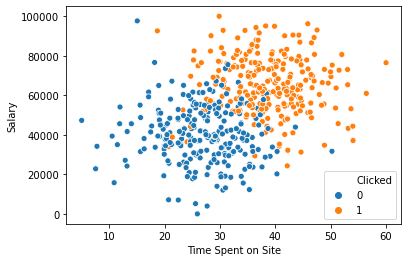

In [18]:
sb.scatterplot(x = 'Time Spent on Site', y = 'Salary', data = data, hue = data['Clicked'])#Scatter plot time spent vs salary
plt.show()

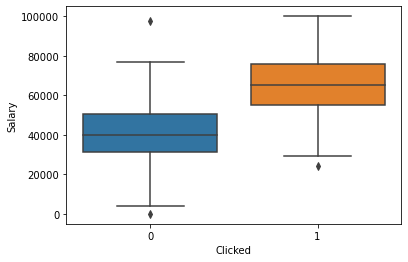

In [19]:
sb.boxplot(x = data['Clicked'], y = data['Salary']) #Box plot Ad clicked vs salary
plt.show()

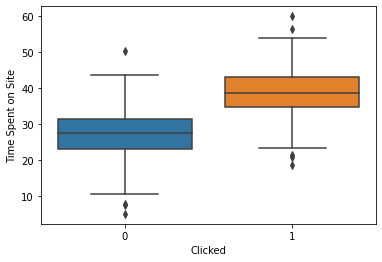

In [20]:
sb.boxplot(x = data['Clicked'], y = data['Time Spent on Site']) #Box plot Ad clicked vs Time spent
plt.show()

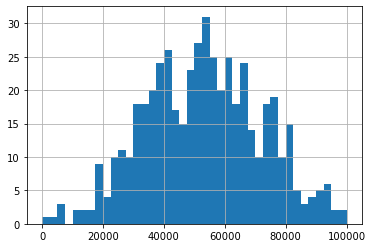

In [21]:
data['Salary'].hist(bins = 40) # Histogram plot on Salary
plt.show()

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [22]:
country = data['Country']
data.drop('Country', axis = 1,inplace = True)

In [23]:
bow = CountVectorizer()
country = bow.fit_transform(country)

In [24]:
#Let's drop the target coloumn before we do train test split
X = data.drop('Clicked', axis = 1).values
y = data['Clicked'].values

In [25]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
X = np.hstack((X, country.todense()))

# STEP#4: MODEL TRAINING

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)

In [27]:
c = {'C': [10^0, 10^-1, 10^-2, 10^-3, 10^-4, 10^-5, 10^-6, 10^-7, 10^-8, 10^-9, 10^10]}
grid = GridSearchCV(estimator = LogisticRegression(tol = 0.000001), param_grid = c, scoring = 'accuracy', cv = 180, refit = True)
grid.fit(X_train, y_train)
print('Best accuracy when C: {} is: {}%'.format(grid.best_params_.get('C'), grid.best_score_*100,'%'))

Best accuracy when C: 10 is: 92.22222222222223%


# STEP#5: MODEL TESTING

Accuracy on CV: 88.88888888888889%


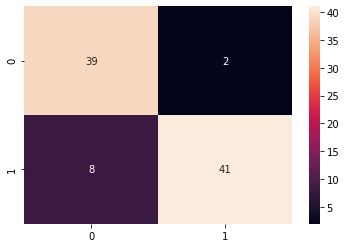

In [28]:
pred_cv = grid.predict(X_cv)
cm = confusion_matrix(y_cv, pred_cv)
sb.heatmap(cm, annot = True, fmt = "d")
print('Accuracy on CV: {}%'.format(accuracy_score(y_cv, pred_cv)*100))

Accuracy on test: 80.0%


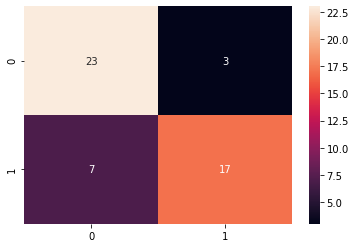

In [29]:
pred_test = grid.predict(X_test)
cm = confusion_matrix(y_test, pred_test)
sb.heatmap(cm, annot = True, fmt = "d")
print('Accuracy on test: {}%'.format(accuracy_score(y_test, pred_test)*100))

In [30]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.85      0.71      0.77        24

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81      0.80      0.80        50



# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()